<a href="https://colab.research.google.com/github/addaia/antibreaking/blob/main/plotter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook will be used to plot some of the data from the experiments

In [1]:
!pip install scienceplots

In [2]:
# imports
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import re
import scienceplots # type: ignore
plt.style.use('science')
# parameters for the science style -- too many
plt.style.use(['science','no-latex'])
plt.rcParams.update({
    "font.size": 16,
    "axes.labelsize": 16,
    "legend.fontsize": 16,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "axes.linewidth": 1,
    "axes.edgecolor": "black",
    "legend.fancybox": True,
    "legend.frameon": True,
    "legend.edgecolor": "black",
    "axes.facecolor": "white",
    "axes.grid": True,
    "grid.color": "#b7b7b7",
    "grid.linestyle": "-",
    "grid.linewidth": 0.5,
})


In [4]:
def parse_data(data_str):
    """
    robot output to lists to plot
    """
    x1 = []
    x2 = []
    for line in data_str.strip().splitlines():
        line = line.strip()
        if not line:
            continue
        parts = line.split()
        if len(parts) >= 2:
            x1.append(float(parts[0]))
            x2.append(float(parts[1]))
        else:
            print("Skipping line:", line)
    return x1, x2

## POS v TIME

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

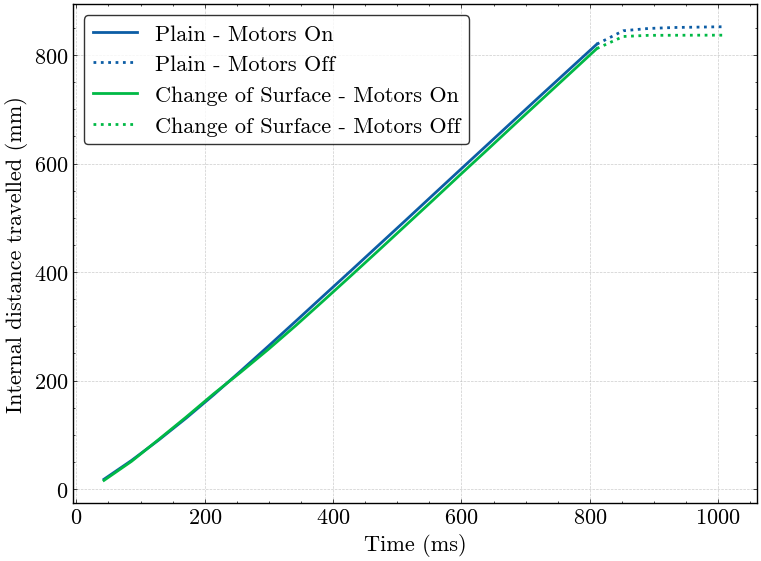

In [ ]:
data_str1 = """
43.00 18.04
86.00 52.78
128.00 90.07
171.00 130.67
214.00 173.68
256.00 217.59
299.00 263.30
342.00 309.61
384.00 355.18
427.00 401.64
470.00 448.55
512.00 494.25
555.00 541.46
598.00 588.50
640.00 634.33
683.00 681.33
726.00 728.17
768.00 773.66
811.00 820.19
852.00 844.81
891.00 849.01
931.00 850.82
972.00 851.57
1012.00 852.32
"""
data_str2 = """
43.00 15.94
86.00 51.13
128.00 91.12
171.00 132.63
214.00 175.63
256.00 215.33
299.00 257.44
342.00 301.49
384.00 346.15
427.00 392.32
470.00 438.93
512.00 484.77
555.00 531.81
598.00 579.29
640.00 625.09
683.00 672.38
726.00 719.22
768.00 765.01
811.00 812.03
852.00 834.26
891.00 836.36
932.00 836.51
972.00 836.66
1012.00 836.66
"""

# parse)
times1, acc1 = parse_data(data_str1)
times2, acc2 = parse_data(data_str2)

# split index
split_index1 = len(times1) - 6
split_index2 = len(times2) - 6

plt.figure(figsize=(8, 6))

# plain
line1, = plt.plot(times1[:split_index1+1], acc1[:split_index1+1], linestyle='-', linewidth=2, label='Plain')
plt.plot(times1[split_index1:], acc1[split_index1:], linestyle=':', linewidth=2, color=line1.get_color())

# CoS
line2, = plt.plot(times2[:split_index2+1], acc2[:split_index2+1], linestyle='-', linewidth=2, label='Change of Surface')
plt.plot(times2[split_index2:], acc2[split_index2:], linestyle=':', linewidth=2, color=line2.get_color())

plt.xlabel("Time (ms)")
plt.ylabel("Internal distance travelled (mm)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# custom legend handles
handle_plain_on  = Line2D([0], [0], color=line1.get_color(), linestyle='-', linewidth=2)
handle_plain_off = Line2D([0], [0], color=line1.get_color(), linestyle=':', linewidth=2)
handle_cos_on    = Line2D([0], [0], color=line2.get_color(), linestyle='-', linewidth=2)
handle_cos_off   = Line2D([0], [0], color=line2.get_color(), linestyle=':', linewidth=2)

# legend
plt.legend(
    [handle_plain_on, handle_plain_off, handle_cos_on, handle_cos_off],
    ['Plain - Motors On', 'Plain - Motors Off',
     'Change of Surface - Motors On', 'Change of Surface - Motors Off']
)

plt.savefig('pos.pdf')
from google.colab import files
files.download('pos.pdf')
plt.show()

## Acceleration vs time

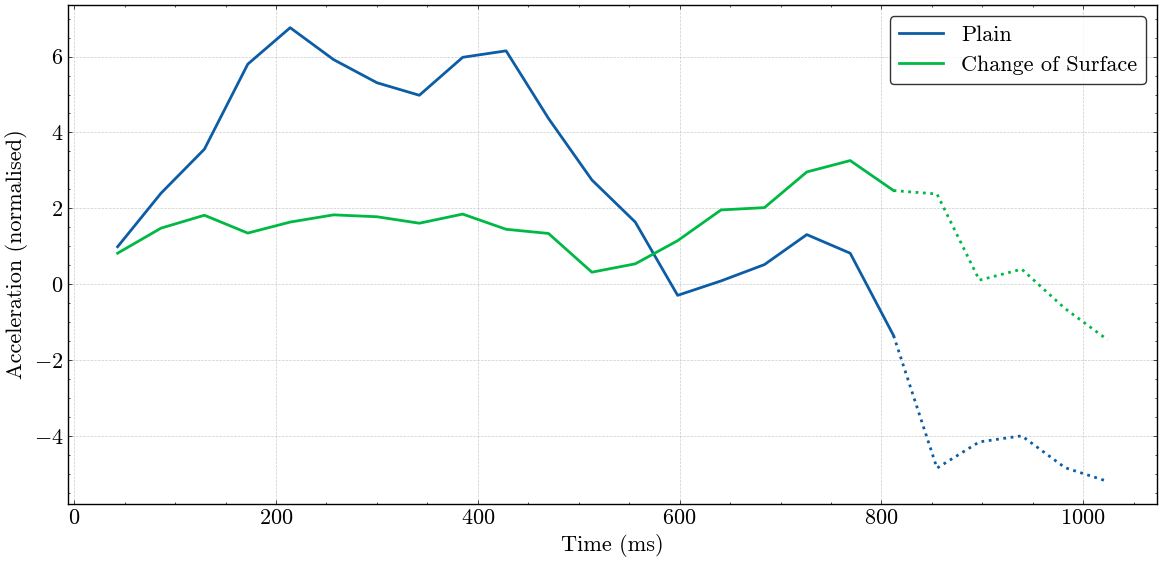

In [ ]:
data_str1 = """
43 0.99
86 2.40
129 3.56
172 5.80
214 6.76
257 5.92
300 5.31
342 4.98
385 5.98
428 6.15
470 4.37
513 2.75
556 1.64
598 -0.29
641 0.09
684 0.52
726 1.31
769 0.82
812 -1.35
855 -4.84
897 -4.15
939 -3.99
982 -4.83
1024 -5.19
"""
data_str2 = """
43 0.82
86 1.48
129 1.82
172 1.35
214 1.64
257 1.83
300 1.78
342 1.61
385 1.85
428 1.45
470 1.34
513 0.32
556 0.54
598 1.15
641 1.96
684 2.02
726 2.96
769 3.26
812 2.47
855 2.38
897 0.11
939 0.40
982 -0.64
1024 -1.46
"""

# parse)
times1, acc1 = parse_data(data_str1)
times2, acc2 = parse_data(data_str2)

# split index
split_index1 = len(times1) - 6
split_index2 = len(times2) - 6

plt.figure(figsize=(12, 6))

# plain
line1, = plt.plot(times1[:split_index1+1], acc1[:split_index1+1], linestyle='-', linewidth=2, label='Plain')
plt.plot(times1[split_index1:], acc1[split_index1:], linestyle=':', linewidth=2, color=line1.get_color())

# CoS
line2, = plt.plot(times2[:split_index2+1], acc2[:split_index2+1], linestyle='-', linewidth=2, label='Change of Surface')
plt.plot(times2[split_index2:], acc2[split_index2:], linestyle=':', linewidth=2, color=line2.get_color())

plt.xlabel("Time (ms)")
plt.ylabel("Acceleration (normalised)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

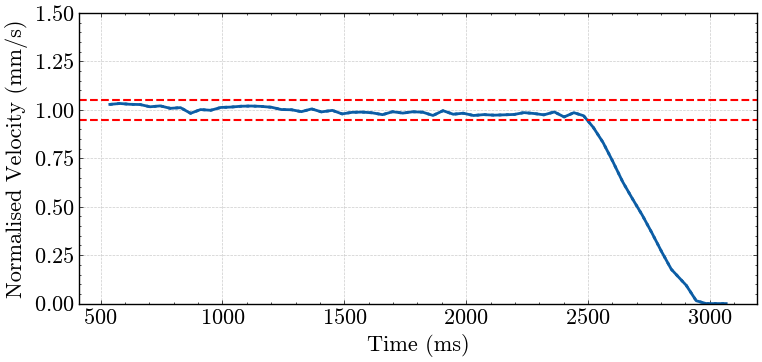

In [ ]:
data_str1 = """
538	1.02814340311997
579	1.03292370742495
620	1.02874372040478
662	1.02745414994111
703	1.01591471768863
745	1.02049491623200
786	1.00786601927746
828	1.01140122106579
869	0.982185779871644
910	1.00141816695911
952	0.997860731197270
993	1.01235728192678
1035	1.01444727543687
1076	1.01864949643055
1118	1.01978342907963
1159	1.01791577530467
1201	1.01344674662885
1242	1.00164050669423
1283	1.00059550993919
1324	0.990723625700070
1366	1.00481996490638
1406	0.989545225103959
1451	0.997260413912458
1491	0.979161959474076
1532	0.987366295699829
1574	0.988455760401894
1615	0.984675984904935
1657	0.975204312189025
1698	0.990412350070908
1740	0.983341946494243
1781	0.990078840468236
1822	0.987944379011129
1864	0.971024325168858
1905	0.995770737687186
1947	0.977361007619643
1988	0.982697161262409
2030	0.970913155301300
2072	0.975493353844675
2115	0.972625171261688
2157	0.974426123116121
2197	0.976293776891090
2237	0.985787683580511
2277	0.981407590798740
2319	0.974270485301541
2362	0.989189481527774
2402	0.963464774174939
2442	0.985409706030815
2482	0.969645818811143
2522	0.909013773045213
2562	0.830905824099224
2602	0.732920702833930
2642	0.629176982429152
2682	0.541775232555345
2722	0.457997620363916
2762	0.365304184794366
2802	0.268008316707930
2842	0.176760089416629
2903	0.0942720476888686
2944	0.0146744225176069
2985	0
3026	0
3067	0
"""


# parse)
times1, norm_vel1 = parse_data(data_str1)

plt.figure(figsize=(8, 4))

line1, = plt.plot(times1, norm_vel1, linestyle='-', linewidth=2)
plt.plot(times1, norm_vel1, linestyle=':', linewidth=2, color=line1.get_color())

plt.axhline(y=0.95, color='red', linestyle='--', linewidth=1.5)  # Horizontal dashed line at 0.95
plt.axhline(y=1.05, color='red', linestyle='--', linewidth=1.5)  # Horizontal dashed line at 1.05
plt.ylim(0, 1.5)  # Set y-axis limit
plt.xlabel("Time (ms)")
plt.ylabel("Normalised Velocity (mm/s)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig('papidiNormVel.pdf')
from google.colab import files
files.download('papidiNormVel.pdf')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

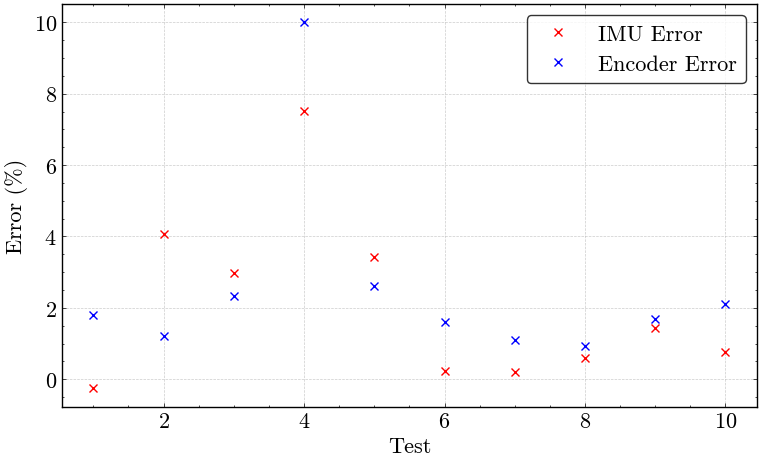

In [ ]:
data_str1 = """
1	-0.253000000000000
2	4.06000000000000
3	2.99000000000000
4	7.52000000000000
5	3.42000000000000
6	0.220000000000000
7	0.193000000000000
8	0.590000000000000
9	1.43000000000000
10	0.771000000000000
"""

data_str2 = """
1	1.81000000000000
2	1.20000000000000
3	2.32000000000000
4	10
5	2.62000000000000
6	1.59000000000000
7	1.11000000000000
8	0.929000000000000
9	1.69000000000000
10	2.10000000000000
"""

# parse)
tests1, imu = parse_data(data_str1)
tests2, encod = parse_data(data_str2)

plt.figure(figsize=(8, 5))

plt.plot(tests1, imu, 'rx', label='IMU Error')
plt.plot(tests2, encod, 'bx', label='Encoder Error')
plt.xlabel('Test')
plt.ylabel('Error (%)')

plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig('starGraphError.pdf')
from google.colab import files
files.download('starGraphError.pdf')
plt.show()


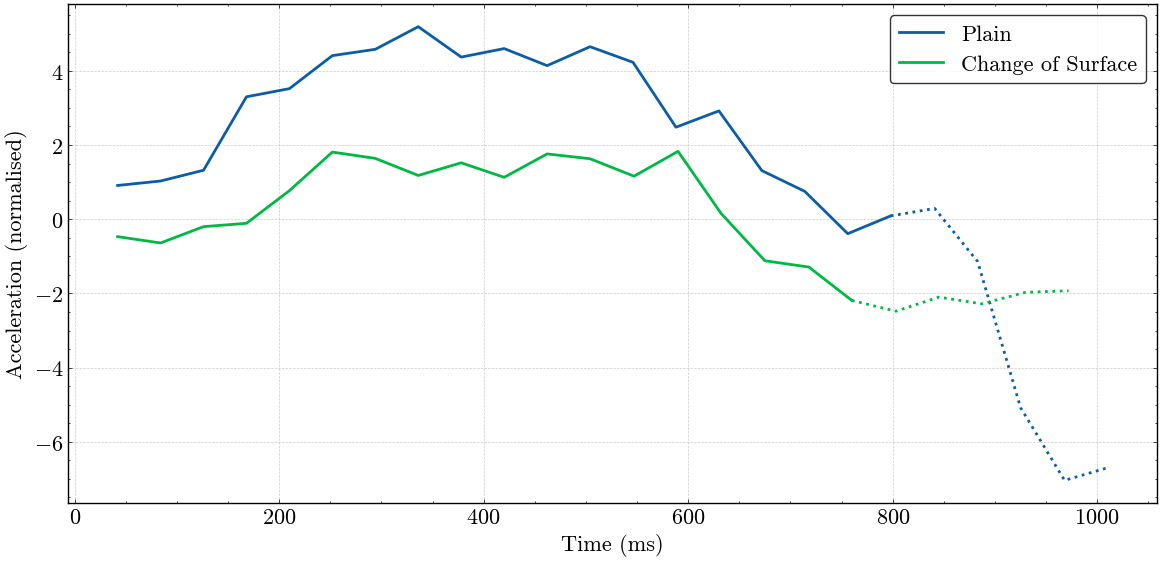

In [ ]:
data_str1 = """
42 0.91
84 1.03
126 1.32
168 3.30
210 3.52
252 4.41
294 4.58
336 5.19
378 4.37
420 4.60
462 4.14
504 4.65
546 4.23
588 2.48
630 2.92
672 1.31
714 0.75
756 -0.39
798 0.09
841 0.29
883 -1.14
925 -5.08
968 -7.04
1010 -6.70

"""
data_str2 = """
42 -0.47
84 -0.64
126 -0.20
168 -0.11
210 0.77
252 1.81
294 1.64
336 1.18
378 1.52
420 1.13
462 1.76
504 1.63
547 1.16
590 1.83
632 0.16
675 -1.12
718 -1.29
760 -2.19
803 -2.48
845 -2.10
887 -2.28
930 -1.97
972 -1.93


"""

# parse)
times1, acc1 = parse_data(data_str1)
times2, acc2 = parse_data(data_str2)

# split index
split_index1 = len(times1) - 6
split_index2 = len(times2) - 6

plt.figure(figsize=(12, 6))

# plain
line1, = plt.plot(times1[:split_index1+1], acc1[:split_index1+1], linestyle='-', linewidth=2, label='Plain')
plt.plot(times1[split_index1:], acc1[split_index1:], linestyle=':', linewidth=2, color=line1.get_color())

# CoS
line2, = plt.plot(times2[:split_index2+1], acc2[:split_index2+1], linestyle='-', linewidth=2, label='Change of Surface')
plt.plot(times2[split_index2:], acc2[split_index2:], linestyle=':', linewidth=2, color=line2.get_color())

plt.xlabel("Time (ms)")
plt.ylabel("Acceleration (normalised)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

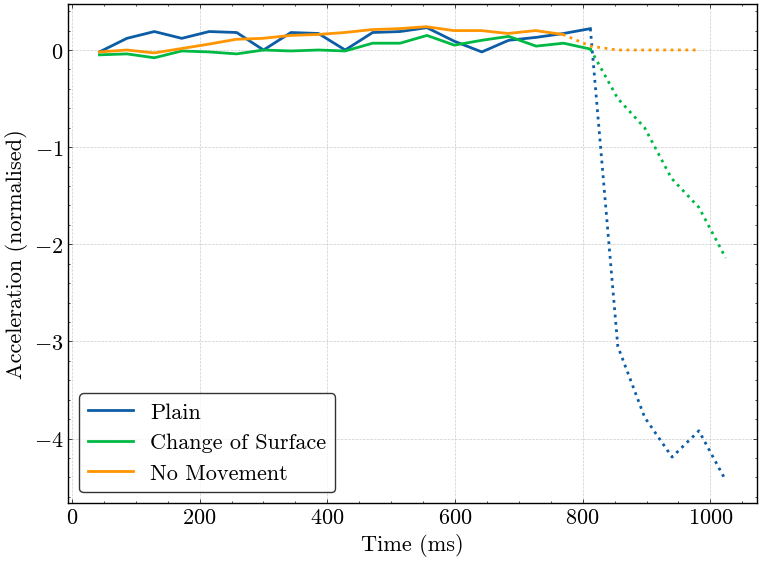

In [ ]:
data_str1 = """
43 -0.02
86 0.12
129 0.19
172 0.12
215 0.19
258 0.18
300 0.00
343 0.18
386 0.17
428 0.00
471 0.18
514 0.19
556 0.23
599 0.09
642 -0.02
684 0.10
727 0.13
770 0.17
812 0.22
855 -3.05
897 -3.78
940 -4.19
982 -3.92
1024 -4.43



"""

data_str2 = """
43 -0.05
86 -0.04
129 -0.08
172 -0.01
215 -0.02
258 -0.04
300 0.00
343 -0.01
386 -0.00
428 -0.01
471 0.07
514 0.07
556 0.15
599 0.05
642 0.10
684 0.14
727 0.04
770 0.07
812 0.01
855 -0.50
897 -0.80
939 -1.32
982 -1.62
1024 -2.14



"""


data_str3 = """
43 -0.02
86 0.00
129 -0.03
214 0.06
257 0.11
299 0.12
342 0.15
385 0.16
427 0.18
470 0.21
513 0.22
555 0.24
598 0.20
641 0.20
683 0.17
726 0.20
769 0.16
812 0.04
854 0.00
896 0.00
938 0.00
981 0.00



"""

# parse)
times1, acc1 = parse_data(data_str1)
times2, acc2 = parse_data(data_str2)
times3, acc3 = parse_data(data_str3)

# split index
split_index1 = len(times1) - 6
split_index2 = len(times2) - 6
split_index3 = len(times3) - 6

plt.figure(figsize=(8, 6))

# plain
line1, = plt.plot(times1[:split_index1+1], acc1[:split_index1+1], linestyle='-', linewidth=2, label='Plain')
plt.plot(times1[split_index1:], acc1[split_index1:], linestyle=':', linewidth=2, color=line1.get_color())

# CoS
line2, = plt.plot(times2[:split_index2+1], acc2[:split_index2+1], linestyle='-', linewidth=2, label='Change of Surface')
plt.plot(times2[split_index2:], acc2[split_index2:], linestyle=':', linewidth=2, color=line2.get_color())

line3, = plt.plot(times3[:split_index3+1], acc3[:split_index3+1], linestyle='-', linewidth=2, label='No Movement')
plt.plot(times3[split_index3:], acc3[split_index3:], linestyle=':', linewidth=2, color=line3.get_color())

plt.xlabel("Time (ms)")
plt.ylabel("Acceleration (normalised)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig('acc.pdf')
from google.colab import files
files.download('acc.pdf')
plt.show()

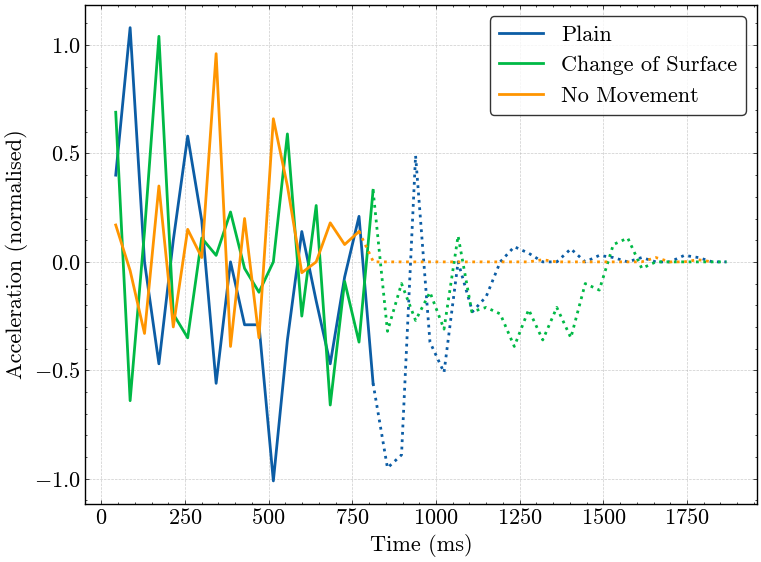

In [ ]:
data_str1 = """
43 0.40
86 1.08
129 0.00
172 -0.47
215 0.10
258 0.58
300 0.19
343 -0.56
386 0.00
428 -0.29
471 -0.29
514 -1.01
556 -0.36
599 0.14
642 -0.18
684 -0.47
727 -0.07
770 0.21
812 -0.56
855 -0.95
897 -0.89
939 0.49
982 -0.37
1024 -0.51
1066 0.00
1109 -0.23
1150 -0.16
1192 0.00
1234 0.07
1277 0.04
1319 0.00
1361 0.00
1403 0.06
1446 0.00
1488 0.03
1530 0.02
1573 0.00
1615 0.02
1657 0.00
1699 0.00
1742 0.03
1784 0.02
1826 0.00
1868 0.00





"""

data_str2 = """
43 0.69
86 -0.64
129 0.14
172 1.04
215 -0.24
258 -0.35
300 0.11
343 0.03
386 0.23
428 -0.03
471 -0.14
514 0.00
556 0.59
599 -0.25
642 0.26
684 -0.66
727 -0.09
770 -0.37
812 0.33
855 -0.32
897 -0.10
939 -0.27
982 -0.14
1024 -0.31
1066 0.12
1107 -0.23
1150 -0.21
1192 -0.24
1234 -0.39
1277 -0.22
1319 -0.36
1361 -0.21
1403 -0.35
1446 -0.10
1488 -0.13
1530 0.08
1573 0.11
1615 -0.03
1657 0.00
1699 0.00
1742 0.00
1784 0.00
1826 0.00
1868 0.00




"""


data_str3 = """
43 0.17
86 -0.04
129 -0.33
172 0.35
215 -0.30
258 0.15
300 0.02
343 0.96
386 -0.39
428 0.20
471 -0.35
514 0.66
556 0.35
599 -0.05
642 0.00
684 0.18
727 0.08
770 0.14
813 0.00
855 0.00
897 0.00
939 0.00
982 0.00
1024 0.00
1066 0.00
1107 0.00
1150 0.00
1192 0.00
1234 0.00
1276 0.00
1319 0.01
1361 0.00
1403 0.00
1445 0.00
1488 0.00
1530 0.00
1572 0.00
1614 0.00
1657 0.02
1699 0.00
1741 0.00
1783 0.01
1826 0.00





"""

# parse)
times1, acc1 = parse_data(data_str1)
times2, acc2 = parse_data(data_str2)
times3, acc3 = parse_data(data_str3)

# split index
split_index1 = len(times1) - 26
split_index2 = len(times2) - 26
split_index3 = len(times3) - 26

plt.figure(figsize=(8, 6))

# plain
line1, = plt.plot(times1[:split_index1+1], acc1[:split_index1+1], linestyle='-', linewidth=2, label='Plain')
plt.plot(times1[split_index1:], acc1[split_index1:], linestyle=':', linewidth=2, color=line1.get_color())

# CoS
line2, = plt.plot(times2[:split_index2+1], acc2[:split_index2+1], linestyle='-', linewidth=2, label='Change of Surface')
plt.plot(times2[split_index2:], acc2[split_index2:], linestyle=':', linewidth=2, color=line2.get_color())

line3, = plt.plot(times3[:split_index3+1], acc3[:split_index3+1], linestyle='-', linewidth=2, label='No Movement')
plt.plot(times3[split_index3:], acc3[split_index3:], linestyle=':', linewidth=2, color=line3.get_color())

plt.xlabel("Time (ms)")
plt.ylabel("Acceleration (normalised)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

#plt.savefig('acc.pdf')
#from google.colab import files
#files.download('acc.pdf')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

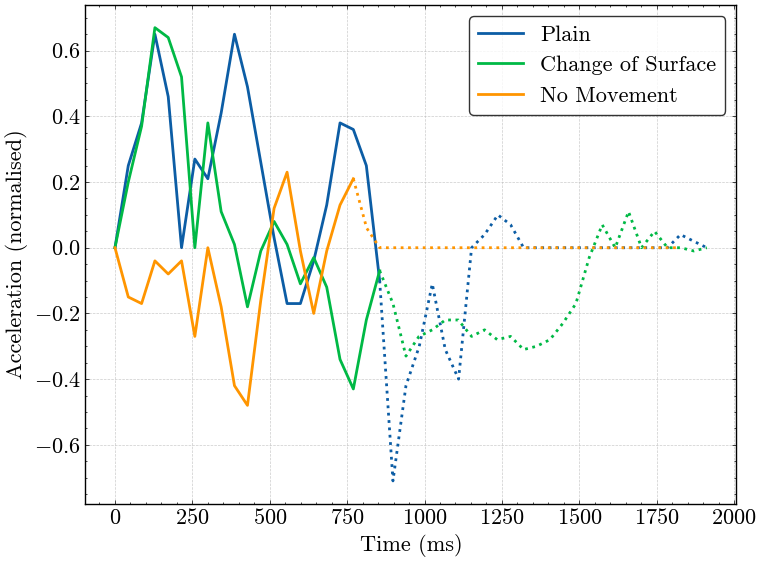

In [ ]:
data_str1 = """
0 0
43 0.25
86 0.38
129 0.65
172 0.46
215 0.00
258 0.27
300 0.21
343 0.41
386 0.65
428 0.49
471 0.26
514 0.03
556 -0.17
599 -0.17
642 -0.04
684 0.13
727 0.38
770 0.36
812 0.25
855 -0.10
898 -0.71
940 -0.42
983 -0.30
1025 -0.11
1067 -0.31
1110 -0.40
1152 0.00
1194 0.04
1237 0.10
1278 0.07
1320 0.00
1362 0.00
1405 0.00
1447 0.00
1489 0.00
1531 0.00
1574 0.00
1616 0.00
1658 0.00
1700 0.00
1743 0.00
1785 0.00
1827 0.04
1869 0.02
1912 0.00


"""

data_str2 = """
0 0
43 0.20
86 0.37
129 0.67
172 0.64
215 0.52
258 0.00
300 0.38
343 0.11
386 0.01
428 -0.18
471 -0.01
514 0.08
556 0.01
599 -0.11
642 -0.03
684 -0.12
727 -0.34
770 -0.43
812 -0.22
855 -0.07
898 -0.17
940 -0.33
982 -0.27
1025 -0.25
1067 -0.22
1109 -0.22
1152 -0.27
1194 -0.25
1235 -0.28
1278 -0.27
1320 -0.31
1362 -0.30
1405 -0.28
1447 -0.23
1489 -0.17
1532 -0.03
1574 0.07
1616 0.00
1659 0.11
1701 0.00
1743 0.05
1785 0.00
1828 0.00
1870 -0.01
1912 0.00





"""


data_str3 = """
0 0
43 -0.15
86 -0.17
129 -0.04
172 -0.08
215 -0.04
258 -0.27
300 0.00
343 -0.18
386 -0.42
428 -0.48
471 -0.16
514 0.12
556 0.23
599 -0.01
642 -0.20
684 -0.01
727 0.13
770 0.21
813 0.06
855 0.00
897 0.00
939 0.00
982 0.00
1024 0.00
1066 0.00
1107 0.00
1150 0.00
1192 0.00
1234 0.00
1276 0.00
1319 0.00
1361 0.00
1403 0.00
1445 0.00
1488 0.00
1530 0.00
1572 0.00
1614 0.00
1657 0.00
1699 0.00
1741 0.00
1783 0.00
1825 0.00






"""

# parse)
times1, acc1 = parse_data(data_str1)
times2, acc2 = parse_data(data_str2)
times3, acc3 = parse_data(data_str3)

# split index
split_index1 = len(times1) - 26
split_index2 = len(times2) - 26
split_index3 = len(times3) - 26

plt.figure(figsize=(8, 6))

# plain
line1, = plt.plot(times1[:split_index1+1], acc1[:split_index1+1], linestyle='-', linewidth=2, label='Plain')
plt.plot(times1[split_index1:], acc1[split_index1:], linestyle=':', linewidth=2, color=line1.get_color())

# CoS
line2, = plt.plot(times2[:split_index2+1], acc2[:split_index2+1], linestyle='-', linewidth=2, label='Change of Surface')
plt.plot(times2[split_index2:], acc2[split_index2:], linestyle=':', linewidth=2, color=line2.get_color())

line3, = plt.plot(times3[:split_index3+1], acc3[:split_index3+1], linestyle='-', linewidth=2, label='No Movement')
plt.plot(times3[split_index3:], acc3[split_index3:], linestyle=':', linewidth=2, color=line3.get_color())

plt.xlabel("Time (ms)")
plt.ylabel("Acceleration (normalised)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig('acc.pdf')
from google.colab import files
files.download('acc.pdf')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

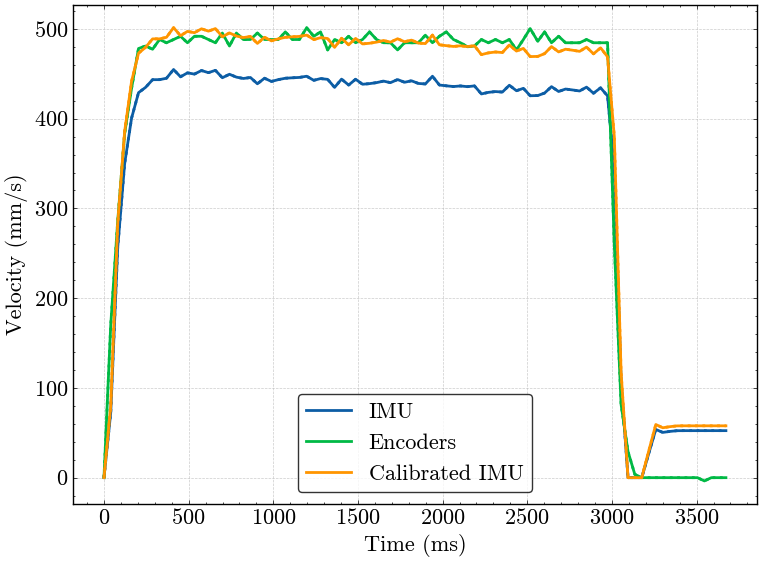

In [ ]:
data_str1 = """
0	0
40	80.2065685435095
81	282.371221104655
122	385.664051439245
163	441.725962235636
204	472.904543107257
246	479.519517832495
287	488.879707068707
328	488.923806900208
369	490.621650413019
411	501.393034257282
452	492.429743504584
493	497.258675054008
534	495.770305740830
576	500.125164101611
617	497.501224127267
658	500.367713174870
699	491.250073011917
741	495.538781625446
782	492.021820063195
823	490.368076381885
865	491.558771832428
906	483.830276361775
948	490.665750244521
989	486.729840283004
1030	488.967906731710
1071	490.643700328770
1113	491.216998138291
1154	491.646971495431
1197	493.124315850734
1239	488.107960017429
1279	490.235776887381
1321	489.287630510096
1362	479.431318169492
1403	489.574279414857
1445	482.297807217095
1486	489.408905046726
1527	483.279028468005
1568	484.028725603532
1610	485.285570801327
1651	487.115713808643
1692	485.241470969826
1734	489.045081436838
1775	485.715544158468
1816	487.512612292158
1857	484.249224761040
1898	483.653877035769
1940	493.124315850734
1981	482.308832174970
2022	481.338635881935
2064	480.467664209779
2105	481.173261513805
2147	480.313314799524
2188	481.239411261057
2229	471.361049004702
2270	473.290416632896
2312	474.282662841682
2353	473.687315116410
2394	482.055258143836
2436	475.319008881969
2477	478.273697592575
2517	469.167082387498
2562	469.376556587130
2602	472.452519834366
2643	480.335364715274
2685	474.370862504685
2726	477.380676004668
2767	476.267155259253
2809	474.988260145707
2850	479.740016990003
2891	472.209970761107
2933	478.913145149348
2974	468.946583229990
3014	379.964148217665
3054	117.228377089091
3095	0
3135	0
3176	0
3218	30.2304344943372
3259	59.2260737066300
3300	55.6098875234999
3341	56.7895580161673
3383	57.6715546461991
3424	57.7707792670776
3464	57.7707792670776
3505	57.7707792670776
3546	57.7707792670776
3587	57.7707792670776
3630	57.7707792670776
3673	57.7707792670776


"""

data_str2 = """
0	0
40	170.510000000000
81	285.690000000000
122	383.320000000000
163	433.950000000000
204	478.160000000000
246	480.960000000000
287	477.350000000000
328	488.200000000000
369	484.570000000000
411	488.190000000000
452	491.790000000000
493	484.560000000000
534	491.790000000000
576	491.790000000000
617	488.180000000000
658	484.570000000000
699	495.420000000000
741	480.940000000000
782	495.420000000000
823	488.180000000000
865	488.190000000000
906	495.410000000000
948	488.190000000000
989	488.180000000000
1030	488.190000000000
1071	496.670000000000
1113	488.200000000000
1154	488.190000000000
1197	501.260000000000
1239	491.790000000000
1279	496.670000000000
1321	476.570000000000
1362	488.190000000000
1403	484.580000000000
1445	491.790000000000
1486	484.580000000000
1527	488.200000000000
1568	496.700000000000
1610	488.190000000000
1651	484.580000000000
1692	484.580000000000
1734	476.570000000000
1775	484.580000000000
1816	484.580000000000
1857	484.580000000000
1898	492.990000000000
1940	484.580000000000
1981	491.810000000000
2022	496.690000000000
2064	488.200000000000
2105	484.580000000000
2147	480.110000000000
2188	480.970000000000
2229	488.190000000000
2270	484.580000000000
2312	488.200000000000
2353	484.580000000000
2394	488.190000000000
2436	476.570000000000
2477	488.190000000000
2517	500.400000000000
2562	486.180000000000
2602	496.700000000000
2643	484.580000000000
2685	491.820000000000
2726	484.580000000000
2767	484.580000000000
2809	484.580000000000
2850	488.200000000000
2891	484.580000000000
2933	484.580000000000
2974	484.580000000000
3014	259.470000000000
3054	81.5500000000000
3095	28.9300000000000
3135	3.71000000000000
3176	0
3218	0
3259	0
3300	0
3341	0
3383	0
3424	0
3464	0
3505	0
3546	-3.62000000000000
3587	0
3630	0
3673	0




"""


data_str3 = """
0	0
40	72.7500000000000
81	256.120000000000
122	349.810000000000
163	400.660000000000
204	428.940000000000
246	434.940000000000
287	443.430000000000
328	443.470000000000
369	445.010000000000
411	454.780000000000
452	446.650000000000
493	451.030000000000
534	449.680000000000
576	453.630000000000
617	451.250000000000
658	453.850000000000
699	445.580000000000
741	449.470000000000
782	446.280000000000
823	444.780000000000
865	445.860000000000
906	438.850000000000
948	445.050000000000
989	441.480000000000
1030	443.510000000000
1071	445.030000000000
1113	445.550000000000
1154	445.940000000000
1197	447.280000000000
1239	442.730000000000
1279	444.660000000000
1321	443.800000000000
1362	434.860000000000
1403	444.060000000000
1445	437.460000000000
1486	443.910000000000
1527	438.350000000000
1568	439.030000000000
1610	440.170000000000
1651	441.830000000000
1692	440.130000000000
1734	443.580000000000
1775	440.560000000000
1816	442.190000000000
1857	439.230000000000
1898	438.690000000000
1940	447.280000000000
1981	437.470000000000
2022	436.590000000000
2064	435.800000000000
2105	436.440000000000
2147	435.660000000000
2188	436.500000000000
2229	427.540000000000
2270	429.290000000000
2312	430.190000000000
2353	429.650000000000
2394	437.240000000000
2436	431.130000000000
2477	433.810000000000
2517	425.550000000000
2562	425.740000000000
2602	428.530000000000
2643	435.680000000000
2685	430.270000000000
2726	433
2767	431.990000000000
2809	430.830000000000
2850	435.140000000000
2891	428.310000000000
2933	434.390000000000
2974	425.350000000000
3014	344.640000000000
3054	106.330000000000
3095	0
3135	0
3176	0
3218	27.4200000000000
3259	53.7200000000000
3300	50.4400000000000
3341	51.5100000000000
3383	52.3100000000000
3424	52.4000000000000
3464	52.4000000000000
3505	52.4000000000000
3546	52.4000000000000
3587	52.4000000000000
3630	52.4000000000000
3673	52.4000000000000

"""

# parse)
times1, vel1 = parse_data(data_str1)
times2, vel2 = parse_data(data_str2)
times3, vel3 = parse_data(data_str3)

plt.figure(figsize=(8, 6))

# imuvel
line3, = plt.plot(times3, vel3, linestyle='-', linewidth=2, label='IMU')
plt.plot(times3, vel3, linestyle=':', linewidth=2, color=line3.get_color())

# encod
line2, = plt.plot(times2, vel2, linestyle='-', linewidth=2, label='Encoders')
plt.plot(times2, vel2, linestyle=':', linewidth=2, color=line2.get_color())

# imuvel*k
line1, = plt.plot(times1, vel1, linestyle='-', linewidth=2, label='Calibrated IMU')
plt.plot(times1, vel1, linestyle=':', linewidth=2, color=line1.get_color())

plt.xlabel("Time (ms)")
plt.ylabel("Velocity (mm/s)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig('papidiVel.pdf')
from google.colab import files
files.download('papidiVel.pdf')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

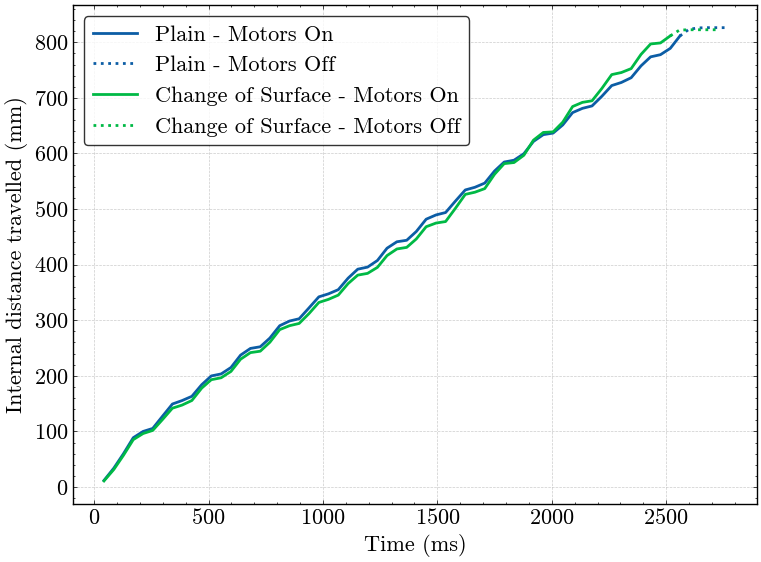

In [6]:
data_str1 = """
43.00 11.13
86.00 32.18
128.00 58.34
171.00 87.52
214.00 99.10
256.00 104.21
299.00 126.31
342.00 147.97
384.00 153.98
427.00 162.40
470.00 183.30
512.00 199.24
555.00 203.00
598.00 213.83
640.00 235.48
683.00 247.96
726.00 250.97
768.00 266.61
811.00 289.61
854.00 297.43
896.00 301.19
939.00 319.09
982.00 339.39
1024.00 344.20
1067.00 352.02
1110.00 373.07
1152.00 389.31
1195.00 392.92
1238.00 404.34
1280.00 426.15
1323.00 438.33
1366.00 441.33
1408.00 455.62
1451.00 478.32
1494.00 486.89
1536.00 491.55
1579.00 510.50
1622.00 530.34
1664.00 535.61
1707.00 542.22
1750.00 561.02
1792.00 576.21
1835.00 579.67
1878.00 591.24
1920.00 612.90
1963.00 624.62
2006.00 627.33
2048.00 641.31
2091.00 664.17
2134.00 671.69
2176.00 676.20
2219.00 693.49
2262.00 712.73
2304.00 717.70
2347.00 725.06
2390.00 744.76
2432.00 760.10
2475.00 763.56
2518.00 773.93
2560.00 795.29
2603.00 806.71
2642.00 809.57
2683.00 810.47
2723.00 810.47
2764.00 810.47
2804.00 810.47


"""

data_str1 = """
43.00 11.73
86.00 33.53
128.00 59.40
171.00 88.27
214.00 99.39
256.00 104.96
299.00 127.36
342.00 149.77
384.00 155.33
427.00 163.90
470.00 185.86
512.00 202.70
555.00 206.16
598.00 217.59
640.00 239.84
683.00 252.62
726.00 255.63
768.00 271.57
811.00 295.33
854.00 303.45
896.00 307.66
939.00 325.25
982.00 344.35
1024.00 349.46
1067.00 357.43
1110.00 379.23
1152.00 395.77
1195.00 399.23
1238.00 411.26
1280.00 433.52
1323.00 445.70
1366.00 448.70
1408.00 463.44
1451.00 487.05
1494.00 494.57
1536.00 499.53
1579.00 518.78
1622.00 538.48
1664.00 543.89
1707.00 550.81
1750.00 570.65
1792.00 586.14
1835.00 589.60
1878.00 601.78
1920.00 624.03
1963.00 636.06
2006.00 638.77
2048.00 653.95
2091.00 676.51
2134.00 684.18
2176.00 688.69
2219.00 706.73
2262.00 726.73
2304.00 731.38
2347.00 738.90
2390.00 759.63
2432.00 775.11
2475.00 778.42
2518.00 790.29
2560.00 811.93
2599.00 823.95
2640.00 826.06
2680.00 826.96
2721.00 827.11
2761.00 827.11

"""
data_str1 = """
43.00 11.88
86.00 33.98
128.00 59.85
171.00 88.72
214.00 100.00
256.00 105.41
299.00 127.51
342.00 149.32
384.00 155.48
427.00 163.15
470.00 184.05
512.00 199.84
555.00 203.45
598.00 215.03
640.00 237.28
683.00 249.31
726.00 252.32
768.00 267.96
811.00 290.21
854.00 298.63
896.00 302.69
939.00 322.24
982.00 342.09
1024.00 347.50
1067.00 355.02
1110.00 375.77
1152.00 391.86
1195.00 395.62
1238.00 407.50
1280.00 429.60
1323.00 441.18
1366.00 443.88
1408.00 459.67
1451.00 481.77
1494.00 489.44
1536.00 493.80
1579.00 514.40
1622.00 534.39
1664.00 539.20
1707.00 546.72
1750.00 568.51
1792.00 584.60
1835.00 587.90
1878.00 599.62
1920.00 621.70
1963.00 633.87
2006.00 636.72
2048.00 651.30
2091.00 673.53
2134.00 681.18
2176.00 685.54
2219.00 702.96
2262.00 722.18
2304.00 727.74
2347.00 736.29
2390.00 757.62
2432.00 773.83
2475.00 777.73
2518.00 789.15
2560.00 811.35
2599.00 823.33
2640.00 825.88
2680.00 826.33
2721.00 826.33
2761.00 826.33
"""
data_str2 = """
43.00 10.98
86.00 31.58
128.00 56.99
171.00 85.26
214.00 96.24
256.00 101.80
299.00 121.50
342.00 141.80
384.00 147.36
427.00 155.63
470.00 177.89
512.00 193.07
555.00 196.53
598.00 207.96
640.00 229.91
683.00 241.79
726.00 244.34
768.00 260.43
811.00 283.14
854.00 290.21
896.00 294.27
939.00 312.01
982.00 332.01
1024.00 337.57
1067.00 345.24
1110.00 365.99
1152.00 381.17
1195.00 384.33
1238.00 395.16
1280.00 416.35
1323.00 428.23
1366.00 431.09
1408.00 446.28
1451.00 468.23
1494.00 474.84
1536.00 477.55
1579.00 501.46
1622.00 526.42
1664.00 530.33
1707.00 536.80
1750.00 562.66
1792.00 581.75
1835.00 583.71
1878.00 596.79
1920.00 624.00
1963.00 637.84
2006.00 638.89
2048.00 656.33
2091.00 684.44
2134.00 691.96
2176.00 694.81
2219.00 717.06
2262.00 741.87
2304.00 745.62
2347.00 752.69
2390.00 778.24
2432.00 797.03
2475.00 798.84
2518.00 811.62
2558.00 821.98
2598.00 822.58
2638.00 822.58
2679.00 822.58
2719.00 822.58



"""

# parse)
times1, acc1 = parse_data(data_str1)
times2, acc2 = parse_data(data_str2)

# split index
split_index1 = len(times1) - 6
split_index2 = len(times2) - 6

plt.figure(figsize=(8, 6))

# plain
line1, = plt.plot(times1[:split_index1+1], acc1[:split_index1+1], linestyle='-', linewidth=2, label='Plain')
plt.plot(times1[split_index1:], acc1[split_index1:], linestyle=':', linewidth=2, color=line1.get_color())

# CoS
line2, = plt.plot(times2[:split_index2+1], acc2[:split_index2+1], linestyle='-', linewidth=2, label='Change of Surface')
plt.plot(times2[split_index2:], acc2[split_index2:], linestyle=':', linewidth=2, color=line2.get_color())

plt.xlabel("Time (ms)")
plt.ylabel("Internal distance travelled (mm)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# custom legend handles
handle_plain_on  = Line2D([0], [0], color=line1.get_color(), linestyle='-', linewidth=2)
handle_plain_off = Line2D([0], [0], color=line1.get_color(), linestyle=':', linewidth=2)
handle_cos_on    = Line2D([0], [0], color=line2.get_color(), linestyle='-', linewidth=2)
handle_cos_off   = Line2D([0], [0], color=line2.get_color(), linestyle=':', linewidth=2)

# legend
plt.legend(
    [handle_plain_on, handle_plain_off, handle_cos_on, handle_cos_off],
    ['Plain - Motors On', 'Plain - Motors Off',
     'Change of Surface - Motors On', 'Change of Surface - Motors Off']
)



plt.savefig('sabs.pdf')
from google.colab import files
files.download('sabs.pdf')
plt.show()

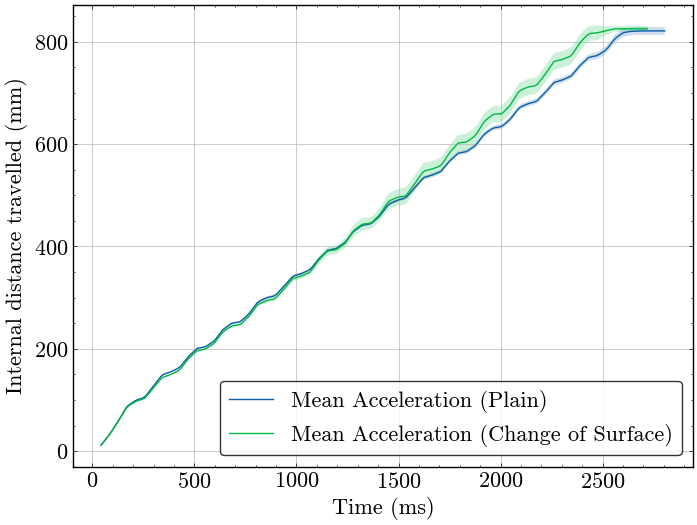

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

def parse_data(data_str):
    data = np.array([list(map(float, line.split())) for line in data_str.strip().splitlines()])
    times = data[:, 0]
    acc = data[:, 1]
    return times, acc


data_str1_trial1 = """\
43.00 11.13
86.00 32.18
128.00 58.34
171.00 87.52
214.00 99.10
256.00 104.21
299.00 126.31
342.00 147.97
384.00 153.98
427.00 162.40
470.00 183.30
512.00 199.24
555.00 203.00
598.00 213.83
640.00 235.48
683.00 247.96
726.00 250.97
768.00 266.61
811.00 289.61
854.00 297.43
896.00 301.19
939.00 319.09
982.00 339.39
1024.00 344.20
1067.00 352.02
1110.00 373.07
1152.00 389.31
1195.00 392.92
1238.00 404.34
1280.00 426.15
1323.00 438.33
1366.00 441.33
1408.00 455.62
1451.00 478.32
1494.00 486.89
1536.00 491.55
1579.00 510.50
1622.00 530.34
1664.00 535.61
1707.00 542.22
1750.00 561.02
1792.00 576.21
1835.00 579.67
1878.00 591.24
1920.00 612.90
1963.00 624.62
2006.00 627.33
2048.00 641.31
2091.00 664.17
2134.00 671.69
2176.00 676.20
2219.00 693.49
2262.00 712.73
2304.00 717.70
2347.00 725.06
2390.00 744.76
2432.00 760.10
2475.00 763.56
2518.00 773.93
2560.00 795.29
2603.00 806.71
2642.00 809.57
2683.00 810.47
2723.00 810.47
2764.00 810.47
2804.00 810.47

"""

data_str1_trial2 = """\
43.00 11.73
86.00 33.53
128.00 59.40
171.00 88.27
214.00 99.39
256.00 104.96
299.00 127.36
342.00 149.77
384.00 155.33
427.00 163.90
470.00 185.86
512.00 202.70
555.00 206.16
598.00 217.59
640.00 239.84
683.00 252.62
726.00 255.63
768.00 271.57
811.00 295.33
854.00 303.45
896.00 307.66
939.00 325.25
982.00 344.35
1024.00 349.46
1067.00 357.43
1110.00 379.23
1152.00 395.77
1195.00 399.23
1238.00 411.26
1280.00 433.52
1323.00 445.70
1366.00 448.70
1408.00 463.44
1451.00 487.05
1494.00 494.57
1536.00 499.53
1579.00 518.78
1622.00 538.48
1664.00 543.89
1707.00 550.81
1750.00 570.65
1792.00 586.14
1835.00 589.60
1878.00 601.78
1920.00 624.03
1963.00 636.06
2006.00 638.77
2048.00 653.95
2091.00 676.51
2134.00 684.18
2176.00 688.69
2219.00 706.73
2262.00 726.73
2304.00 731.38
2347.00 738.90
2390.00 759.63
2432.00 775.11
2475.00 778.42
2518.00 790.29
2560.00 811.93
2599.00 823.95
2640.00 826.06
2680.00 826.96
2721.00 827.11
2761.00 827.11

"""

data_str1_trial3 = """\
43.00 11.88
86.00 33.98
128.00 59.85
171.00 88.72
214.00 100.00
256.00 105.41
299.00 127.51
342.00 149.32
384.00 155.48
427.00 163.15
470.00 184.05
512.00 199.84
555.00 203.45
598.00 215.03
640.00 237.28
683.00 249.31
726.00 252.32
768.00 267.96
811.00 290.21
854.00 298.63
896.00 302.69
939.00 322.24
982.00 342.09
1024.00 347.50
1067.00 355.02
1110.00 375.77
1152.00 391.86
1195.00 395.62
1238.00 407.50
1280.00 429.60
1323.00 441.18
1366.00 443.88
1408.00 459.67
1451.00 481.77
1494.00 489.44
1536.00 493.80
1579.00 514.40
1622.00 534.39
1664.00 539.20
1707.00 546.72
1750.00 568.51
1792.00 584.60
1835.00 587.90
1878.00 599.62
1920.00 621.70
1963.00 633.87
2006.00 636.72
2048.00 651.30
2091.00 673.53
2134.00 681.18
2176.00 685.54
2219.00 702.96
2262.00 722.18
2304.00 727.74
2347.00 736.29
2390.00 757.62
2432.00 773.83
2475.00 777.73
2518.00 789.15
2560.00 811.35
2599.00 823.33
2640.00 825.88
2680.00 826.33
2721.00 826.33
2761.00 826.33
"""

data_str2_trial1 = """\
43.00 10.98
86.00 31.58
128.00 56.99
171.00 85.26
214.00 96.24
256.00 101.80
299.00 121.50
342.00 141.80
384.00 147.36
427.00 155.63
470.00 177.89
512.00 193.07
555.00 196.53
598.00 207.96
640.00 229.91
683.00 241.79
726.00 244.34
768.00 260.43
811.00 283.14
854.00 290.21
896.00 294.27
939.00 312.01
982.00 332.01
1024.00 337.57
1067.00 345.24
1110.00 365.99
1152.00 381.17
1195.00 384.33
1238.00 395.16
1280.00 416.35
1323.00 428.23
1366.00 431.09
1408.00 446.28
1451.00 468.23
1494.00 474.84
1536.00 477.55
1579.00 501.46
1622.00 526.42
1664.00 530.33
1707.00 536.80
1750.00 562.66
1792.00 581.75
1835.00 583.71
1878.00 596.79
1920.00 624.00
1963.00 637.84
2006.00 638.89
2048.00 656.33
2091.00 684.44
2134.00 691.96
2176.00 694.81
2219.00 717.06
2262.00 741.87
2304.00 745.62
2347.00 752.69
2390.00 778.24
2432.00 797.03
2475.00 798.84
2518.00 811.62
2558.00 821.98
2598.00 822.58
2638.00 822.58
2679.00 822.58
2719.00 822.58
"""
data_str2_trial2 = """\
43.00 11.13
86.00 32.48
128.00 58.19
171.00 86.91
214.00 98.04
256.00 103.76
299.00 124.65
342.00 145.10
384.00 151.27
427.00 159.99
470.00 182.24
512.00 198.78
555.00 202.69
598.00 213.82
640.00 236.97
683.00 247.95
726.00 250.51
768.00 267.50
811.00 290.65
854.00 299.08
896.00 303.14
939.00 322.98
982.00 344.78
1024.00 349.44
1067.00 357.10
1110.00 383.41
1152.00 402.35
1195.00 404.46
1238.00 417.37
1280.00 445.01
1323.00 458.53
1366.00 459.58
1408.00 477.31
1451.00 506.16
1494.00 514.13
1536.00 517.13
1579.00 540.57
1622.00 565.81
1664.00 569.86
1707.00 576.02
1750.00 601.72
1792.00 621.10
1835.00 623.21
1878.00 636.13
1920.00 663.34
1963.00 677.02
2006.00 678.07
2048.00 695.20
2091.00 723.15
2134.00 730.82
2176.00 733.53
2219.00 756.37
2262.00 781.48
2304.00 785.69
2347.00 792.75
2390.00 819.21
2430.00 832.44
2470.00 833.19
2510.00 833.19
2551.00 833.19
2591.00 833.19
"""
data_str2_trial3 = """\
43.00 12.48
86.00 36.84
128.00 61.78
171.00 87.94
214.00 97.87
256.00 102.68
299.00 123.27
342.00 144.77
384.00 150.64
427.00 158.91
470.00 180.56
512.00 196.20
555.00 199.80
598.00 211.08
640.00 233.33
683.00 244.60
726.00 247.31
768.00 263.39
811.00 286.25
854.00 293.17
896.00 296.32
939.00 315.27
982.00 335.39
1024.00 339.75
1067.00 347.24
1110.00 371.98
1152.00 389.86
1195.00 392.57
1238.00 404.74
1280.00 431.66
1323.00 444.74
1366.00 445.79
1408.00 463.23
1451.00 491.19
1494.00 499.16
1536.00 502.02
1579.00 525.02
1622.00 549.83
1664.00 553.74
1707.00 559.75
1750.00 584.70
1792.00 603.94
1835.00 606.20
1878.00 618.67
1920.00 645.87
1963.00 659.85
2006.00 660.90
2048.00 677.43
2091.00 704.79
2134.00 712.30
2176.00 714.86
2219.00 737.10
2262.00 761.91
2304.00 765.81
2347.00 773.03
2390.00 799.34
2432.00 818.43
2471.00 820.68
2512.00 820.68
2552.00 820.68
2593.00 820.68
2633.00 820.68
"""
# organise
data1_trials = [parse_data(s) for s in [data_str1_trial1, data_str1_trial2, data_str1_trial3]]
data2_trials = [parse_data(s) for s in [data_str2_trial1, data_str2_trial2, data_str2_trial3]]

# define times
common_times1 = np.linspace(data1_trials[0][0][0], data1_trials[0][0][-1], 200)
common_times2 = np.linspace(data2_trials[0][0][0], data2_trials[0][0][-1], 200)

# interpolate
acc1_all_interp = []
acc2_all_interp = []
for times, acc in data1_trials:
    acc_interp1 = np.interp(common_times1, times, acc)
    acc1_all_interp.append(acc_interp1)
acc1_all_interp = np.array(acc1_all_interp)

for times, acc in data2_trials:
    acc_interp2 = np.interp(common_times2, times, acc)
    acc2_all_interp.append(acc_interp2)
acc2_all_interp = np.array(acc2_all_interp)

# get stats
mean_acc1 = np.mean(acc1_all_interp, axis=0)
std_acc1 = np.std(acc1_all_interp, axis=0)

mean_acc2 = np.mean(acc2_all_interp, axis=0)
std_acc2 = np.std(acc2_all_interp, axis=0)

# ploton
plt.figure(figsize=(8, 6))
plt.plot(common_times1, mean_acc1, label="Mean Acceleration (Plain)")
plt.fill_between(common_times1, mean_acc1 - std_acc1, mean_acc1 + std_acc1, alpha=0.2)
plt.plot(common_times2, mean_acc2, label="Mean Acceleration (Change of Surface)")
plt.fill_between(common_times2, mean_acc2 - std_acc2, mean_acc2 + std_acc2, alpha=0.2)
plt.xlabel("Time (ms)")
plt.ylabel("Internal distance travelled (mm)")
plt.legend()
plt.show()


box plot

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

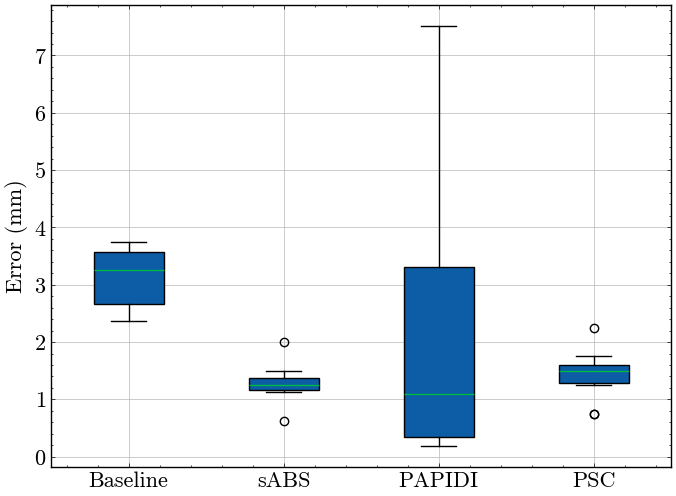

In [ ]:
import numpy as np
errors_baseline = np.array([21, 19, 20, 30, 22, 26, 30, 29, 27, 26])/8
errors_sABS = np.array([5, 10, 9, 12, 11, 10, 10, 11, 9, 16])/8
errors_PAPIDI = np.array([0.253, 4.06, 2.99, 7.52, 3.42, 0.22, 0.193, 0.59, 1.43, 0.771])
errors_PSC = np.array([10, 6, 11, 12, 12, 6, 18, 13, 14, 12])/8

# combine
data = [errors_baseline, errors_sABS, errors_PAPIDI, errors_PSC]

# boxplo
plt.figure(figsize=(8, 6))
plt.boxplot(data, patch_artist=True)


plt.xticks([1, 2, 3, 4], ['Baseline','sABS', 'PAPIDI', 'PSC'])
plt.ylabel('Error (mm)')

plt.savefig('comp.pdf')
from google.colab import files
files.download('comp.pdf')

plt.show()
